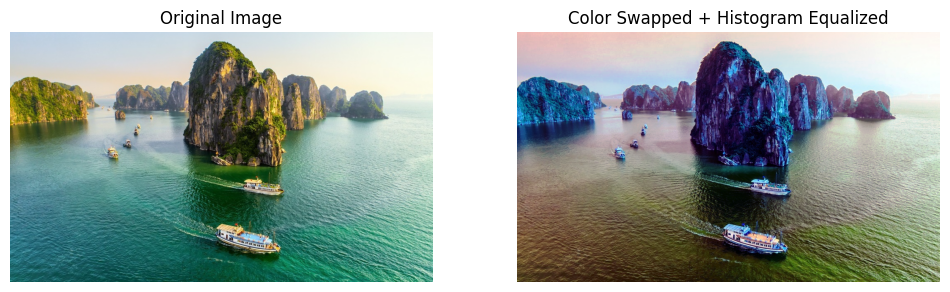

In [1]:
from PIL import Image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def change_color_order_and_equalize(image):
    # Đổi thứ tự màu RGB -> BGR
    swapped_image = image[:, :, ::-1]  # Hoán đổi kênh màu (RGB -> BGR)

    # Tách 3 kênh màu
    b, g, r = cv2.split(swapped_image)

    # Cân bằng histogram cho từng kênh
    equalized_b = cv2.equalizeHist(b)
    equalized_g = cv2.equalizeHist(g)
    equalized_r = cv2.equalizeHist(r)

    # Gộp lại ảnh sau khi cân bằng
    result = cv2.merge((equalized_b, equalized_g, equalized_r))
    return result

def process_image():
    input_folder = 'exercise'
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)

    filename = 'quang_ninh.jpg'  # Đổi tên file ảnh ở đây
    img_path = os.path.join(input_folder, filename)

    if not os.path.exists(img_path):
        print('Ảnh không tồn tại trong thư mục exercise.')
        return

    image = cv2.imread(img_path)

    result = change_color_order_and_equalize(image)

    # Lưu ảnh kết quả
    save_path = os.path.join(output_folder, f'equalized_{filename}')
    cv2.imwrite(save_path, result)

    # Hiển thị ảnh gốc và ảnh kết quả
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Color Swapped + Histogram Equalized')
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

process_image()